### Import

In [236]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import accuracy_score, log_loss,mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

### Juntar datasets de testes

In [237]:
import os

mypath = "../data"
test_names = [f for f in os.listdir(mypath) if "test" in f]
test_files = [pd.read_csv("../data/%s"  % file, header = None) for file in test_names]
test = pd.concat(test_files, axis = 0, ignore_index = True)

# export to csv
testfilename = "../data/modified/blogData_test.csv"
test.to_csv(testfilename, index=False, header=False)
print(testfilename + " criado!")

../data/modified/blogData_test.csv criado!


### Informações do Dataset de treino

In [238]:
dataset_train = pd.read_csv('../data/blogData_train.csv', header=None, names=["X"+str(x) if x != 281 else "Y" for x in range(1, 282)])

In [239]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 281 entries, X1 to Y
dtypes: float64(281)
memory usage: 112.3 MB


In [240]:
dataset_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X272,X273,X274,X275,X276,X277,X278,X279,X280,Y
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [241]:
print(dataset_train.corr()[:]["Y"])

X1      0.485464
X2      0.424616
X3      0.053221
X4      0.356604
X5      0.491707
          ...   
X277   -0.005661
X278         NaN
X279   -0.002362
X280   -0.001354
Y       1.000000
Name: Y, Length: 281, dtype: float64


### Variance threshold

In [242]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=(0.25))

In [243]:
dataset_test = pd.read_csv('../data/modified/blogData_test.csv', header=None, names=["X"+str(x) if x != 281 else "Y" for x in range(1, 282)])

In [244]:
x_train = dataset_train.iloc[:, :-1]
y_train = dataset_train.iloc[:, -1]

x_train_vt = vt.fit_transform(x_train, y_train)

# x_test = dataset_test.drop(dataset_test["Y"])
# y_test = dataset_test.iloc[:, -1]

# x_test_vt = vt.fit_transform(x_test, y_test)

In [245]:
result = vt.get_support()

false_indexes = [x+1 for x in range(len(result)) if not result[x]]
print(false_indexes)

[8, 13, 28, 31, 33, 35, 36, 38, 40, 43, 46, 50, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,

In [246]:
dataset_new = dataset_train
for x in false_indexes:
    dataset_new = dataset_new.drop("X"+str(x), axis=1)

In [225]:
zzxzvzvzvzv

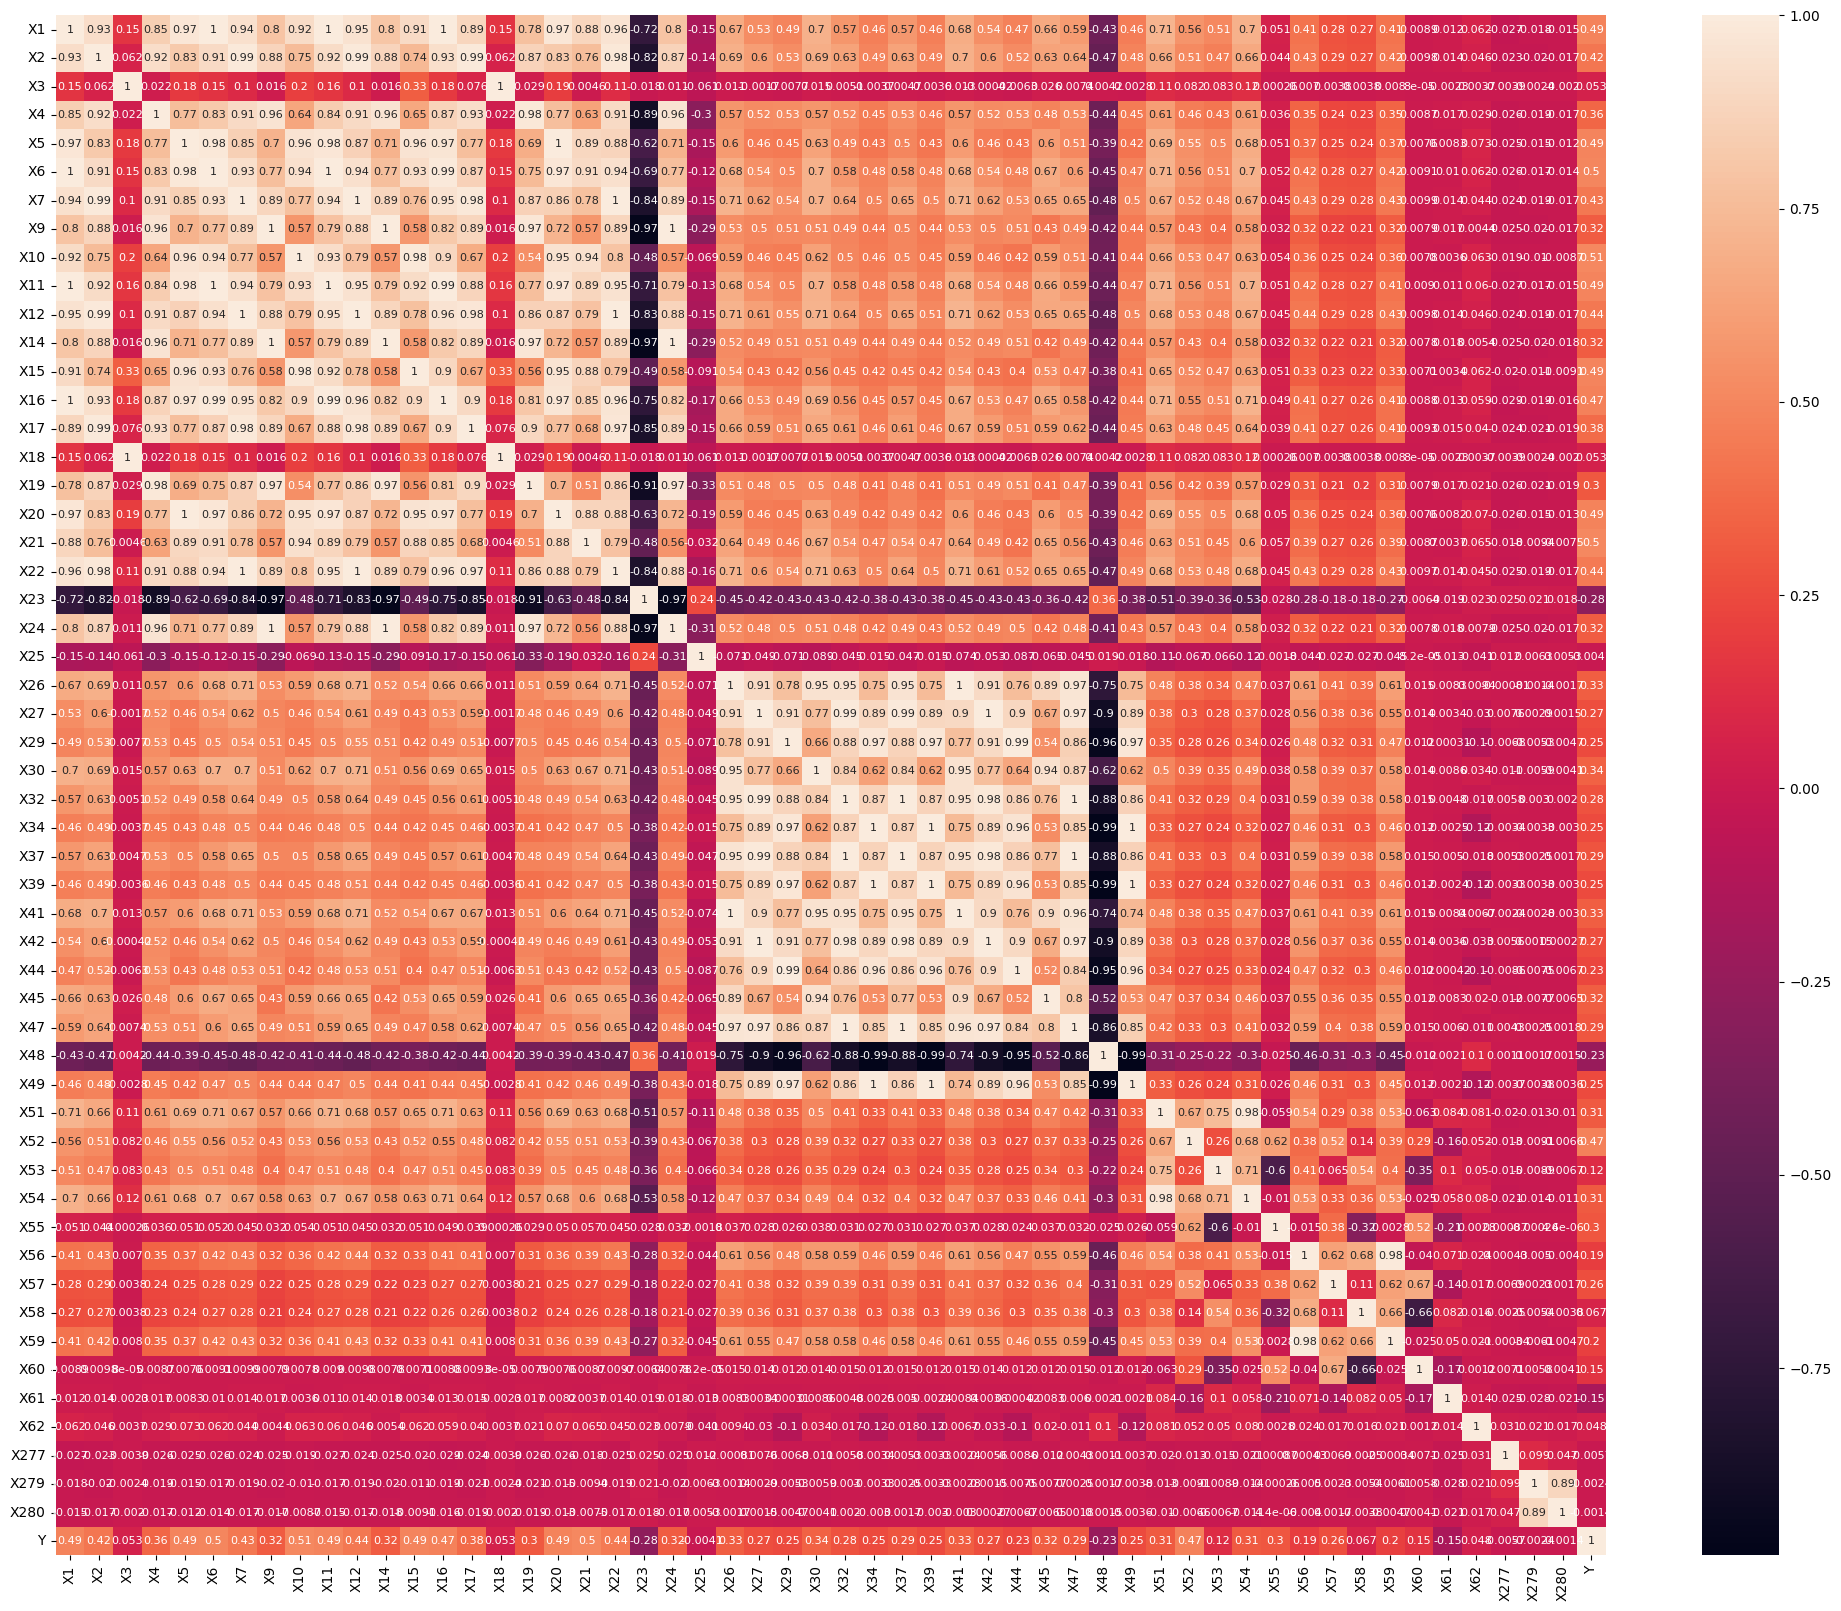

In [247]:
plt.figure(figsize=(25,20))
sns.heatmap(dataset_new.corr(),annot=True, annot_kws={"size": 8})
plt.show()

In [248]:
print(dataset_new.shape)
print(testset_new.shape)

(52397, 54)
(7624, 40)


In [249]:
newcsv = "../data/modified/blogData_newTrain.csv"
dataset_new.to_csv(newcsv, index=False)
print(newcsv + " criado!")

newtestcsv = "../data/modified/blogData_newTest.csv"
testset_new.to_csv(newtestcsv, index=False)
print(newtestcsv + " criado!")

../data/modified/blogData_newTrain.csv criado!
../data/modified/blogData_newTest.csv criado!


In [18]:
del dataset_new
del testset_new
del dataset_train
del dataset_test

### Extra Trees

In [19]:
dataset_train = pd.read_csv('../data/blogData_train.csv', header=None, names=["X"+str(x) if x != 281 else "Y" for x in range(1, 282)])
dataset_test = pd.read_csv('../data/modified/blogData_test.csv', header=None, names=["X"+str(x) if x != 281 else "Y" for x in range(1, 282)])

In [20]:
x_train = dataset_train.iloc[:, :-2]
y_train = dataset_train.iloc[:, -1]

print(len(x_train), len(y_train))

52397 52397


In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)

MemoryError: could not allocate 229638144 bytes

In [23]:
model = SelectFromModel(clf, prefit=True)
aux = model.get_support()
false_idx = [x for x in range(len(aux)) if not aux[x]]

dataset_trainnew = dataset_train
dataset_testnew = dataset_test

for x in false_idx:
    dataset_trainnew = dataset_trainnew.drop("X"+str(x), axis=1)
    dataset_testnew = dataset_testnew.drop("X"+str(x), axis=1)

In [24]:
plt.figure(figsize=(25,20))
sns.heatmap(dataset_trainnew.corr(),annot=True, annot_kws={"size": 8})
plt.show()

In [ ]:
print(dataset_trainnew.shape)
print(dataset_testnew.shape)

(52397, 281)
(7624, 281)


In [ ]:
newcsv = "../data/modified/blogData_newTrainET.csv"
dataset_trainnew.to_csv(newcsv, index=False)
print(newcsv + " criado!")

newtestcsv = "../data/modified/blogData_newTestET.csv"
dataset_testnew.to_csv(newtestcsv, index=False)
print(newtestcsv + " criado!")

../data/modified/blogData_newTrainET.csv criado!
../data/modified/blogData_newTestET.csv criado!


### CC

In [250]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("../data/modified/blogData_newTrain.csv")
data = np.delete(data,0,0)
trainSet = data[:,:5]
trainSet = pd.DataFrame(trainSet)
testSet = data[:,-1]

Xtrain,Xtest,ytrain,ytest = train_test_split(trainSet,testSet,test_size=1/5)

print(Xtest)


[  0. 113.   3. ...   1.   0.   0.]


In [251]:
a_list = 10**np.linspace(-1,5, 7)
ratio = np.linspace(0,1, 20)
mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)

### Random Forest Regressor

Mean Squared Error của Random Forest: 745.4183054664879
R-squared của Random Forest: 0.5852477624649035


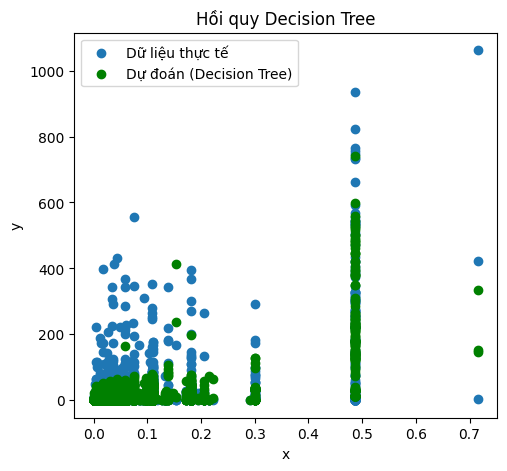

In [252]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(max_depth=20, n_estimators=200,max_leaf_nodes=20)
random_forest.fit(Xtrain, ytrain.ravel())

y_pred_rf = random_forest.predict(Xtest)

mse_rf = mean_squared_error(ytest, y_pred_rf)
r2_rf = r2_score(ytest,y_pred_rf)

print("Mean Squared Error của Random Forest:", mse_rf)
print("R-squared của Random Forest:", r2_rf)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(Xtest[0],ytest, label='Dữ liệu thực tế')
plt.scatter(Xtest[0],y_pred_rf, color='green', label='Dự đoán (Decision Tree)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hồi quy Decision Tree')
plt.legend()

plt.show()



### Bagging Regressor

In [149]:
from sklearn.metrics import accuracy_score, log_loss,mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor


bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10,splitter="best",min_samples_leaf=3), n_estimators=200,max_samples=0.2,max_features=0.9)
bagging_regressor.fit(Xtrain, ytrain)

y_pred_bg = bagging_regressor.predict(Xtest)

mse_bg = mean_squared_error(ytest,y_pred_bg)
r2_bg = r2_score(ytest,y_pred_bg)

print("Mean Squared Error của Random Forest:", mse_bg)
print("R-squared của Random Forest:", r2_bg)

Mean Squared Error của Random Forest: 1.6570269577945526e-05
R-squared của Random Forest: 0.9776828397680104


### AdaBoost Regressor


In [153]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_boost_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20, max_leaf_nodes=200,criterion="poisson",splitter="best"),
                                        n_estimators=100,learning_rate=0.3)

# Huấn luyện mô hình
ada_boost_regressor.fit(Xtrain, ytrain)

# Dự đoán trên dữ liệu kiểm tra
y_pred_ab = ada_boost_regressor.predict(Xtest)

# Đánh giá mô hình bằng Mean Squared Error
mse_ab = mean_squared_error(ytest, y_pred_ab)
r2_ab = r2_score(ytest,y_pred_ab)

print("Mean Squared Error của AdaBoost:", mse_ab)
print("R-squared của AdaBoost:", r2_ab)

Mean Squared Error của AdaBoost: 4.005570013848945e-08
R-squared của AdaBoost: 0.9999369244767086


### KNN Regressor

In [235]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=15)
knn_regressor.fit(Xtrain, ytrain)
y_pred_knn = knn_regressor.predict(Xtest)

mse_knn = mean_squared_error(ytest, y_pred_knn)
r2_knn = r2_score(ytest,y_pred_knn)

print("Mean Squared Error của KNN:", mse_knn)
print("R-squared của KNN:", r2_knn)

Mean Squared Error của KNN: 0.00043133678012418323
R-squared của KNN: 0.5084013924046002


### Decision Tree Regressor

In [ ]:
print("Số lượng mẫu trong Xtest:", Xtest.shape[0])
print("Số lượng mẫu trong ytest:", ytest.shape[0])

Mean Squared Error của Decision Tree Regressor: 0.00042096923199967684
R-squared của Decision Tree Regressor: 0.5202173850512701


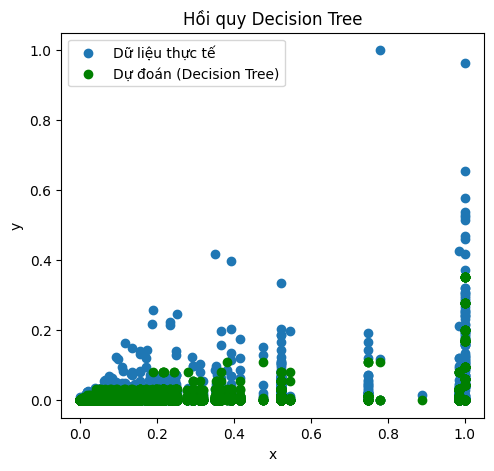

In [233]:
from sklearn.tree import DecisionTreeRegressor


decision_tree_regressor = DecisionTreeRegressor(max_depth=20,max_leaf_nodes=20)
decision_tree_regressor.fit(Xtrain, ytrain)
y_pred_dt = decision_tree_regressor.predict(Xtest)

mse_dt = mean_squared_error(ytest, y_pred_dt)
r2_dt = r2_score(ytest,y_pred_dt)

print("Mean Squared Error của Decision Tree Regressor:", mse_dt)
print("R-squared của Decision Tree Regressor:", r2_dt)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(Xtest[3],ytest, label='Dữ liệu thực tế')
plt.scatter(Xtest[3],y_pred_dt, color='green', label='Dự đoán (Decision Tree)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hồi quy Decision Tree')
plt.legend()

plt.show()






In [ ]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from xgboost import plot_importance



tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=5, error_score='raise',estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)



In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
Xtest = test.iloc[:, 0:30]
ytest = test.iloc[:, -1]

y_train_pred = model.predict(Xtrain)
y_pred = model.predict(Xtest)

print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(ytrain.values, y_train_pred)))
print("R-squared: ", rs(ytrain.values, y_train_pred))
print("Mean Absolute Error: ", mae(ytrain.values, y_train_pred))

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(Xtest[2],ytest, label='Dữ liệu thực tế')
plt.scatter(Xtest[2],y_pred_dt, color='green', label='Dự đoán (Decision Tree)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hồi quy Decision Tree')
plt.legend()

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(Xtest[3],ytest, label='Dữ liệu thực tế')
plt.scatter(Xtest[3],y_pred_dt, color='green', label='Dự đoán (Decision Tree)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hồi quy Decision Tree')
plt.legend()

plt.show()


